# Diffusion Model

100%|██████████| 469/469 [00:19<00:00, 24.26it/s]


Epoch 0: Loss = 0.5485


100%|██████████| 469/469 [00:19<00:00, 23.81it/s]


Epoch 1: Loss = 0.5057


100%|██████████| 469/469 [00:17<00:00, 26.50it/s]


Epoch 2: Loss = 0.5290


100%|██████████| 469/469 [00:19<00:00, 24.04it/s]


Epoch 3: Loss = 0.5066


100%|██████████| 469/469 [00:17<00:00, 26.35it/s]


Epoch 4: Loss = 0.5086


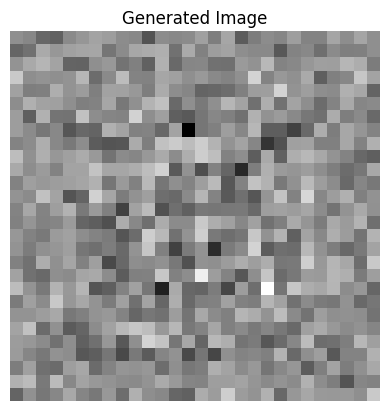

In [2]:
# 在MNIST图像上玩加噪+去噪
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. 加载 MNIST 数据
transform = transforms.Compose([transforms.ToTensor()])
mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(mnist, batch_size=128, shuffle=True)

# 2. 定义一个简单的去噪网络（MLP）
class SimpleDenoiseNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
        )
    def forward(self, x, t):  # x是加噪图，t是时间步
        x = x.view(x.size(0), -1)
        return self.net(x)

# 3. 加噪函数
def q_sample(x_0, t, noise):
    # x_0: 原始图像, t: 步数, noise: 要加的噪声
    sqrt_alpha = torch.sqrt(alphas_bar[t])[:, None, None, None]
    sqrt_one_minus = torch.sqrt(1 - alphas_bar[t])[:, None, None, None]
    return sqrt_alpha * x_0 + sqrt_one_minus * noise

# 4. 初始化
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleDenoiseNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 5. 设定加噪步数
T = 100
betas = torch.linspace(1e-4, 0.02, T)
alphas = 1 - betas
alphas_bar = torch.cumprod(alphas, dim=0).to(device)

# 6. 训练循环
for epoch in range(5):
    for x, _ in tqdm(loader):
        x = x.to(device)
        noise = torch.randn_like(x)
        t = torch.randint(0, T, (x.size(0),), device=device).long()
        x_t = q_sample(x, t, noise)

        # 预测噪声
        pred_noise = model(x_t, t)
        loss = F.mse_loss(pred_noise, noise.view(noise.size(0), -1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 7. 采样过程：从纯噪声一步步生成图像
@torch.no_grad()
def sample(model):
    model.eval()
    x = torch.randn(1, 1, 28, 28).to(device)
    for t in reversed(range(T)):
        t_tensor = torch.tensor([t], device=device).long()
        pred_noise = model(x, t_tensor).view(1, 1, 28, 28)
        alpha_t = alphas[t]
        alpha_bar_t = alphas_bar[t]
        x = (1 / torch.sqrt(alpha_t)) * (x - (1 - alpha_t) / torch.sqrt(1 - alpha_bar_t) * pred_noise)
        if t > 0:
            x += torch.sqrt(betas[t]) * torch.randn_like(x)
    return x

# 8. 可视化结果
img = sample(model).cpu().squeeze().numpy()
plt.imshow(img, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()

# MLP实现Diffusion Model

创建数据集...
开始训练...
Epoch 0/1000, Loss: 1.0986
Epoch 100/1000, Loss: 0.1269
Epoch 200/1000, Loss: 0.1227
Epoch 300/1000, Loss: 0.0834
Epoch 400/1000, Loss: 0.0844
Epoch 500/1000, Loss: 0.0625
Epoch 600/1000, Loss: 0.1071
Epoch 700/1000, Loss: 0.1364
Epoch 800/1000, Loss: 0.1193
Epoch 900/1000, Loss: 0.1002
生成新样本...


/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:243: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:243: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:243: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:243: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:243: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q

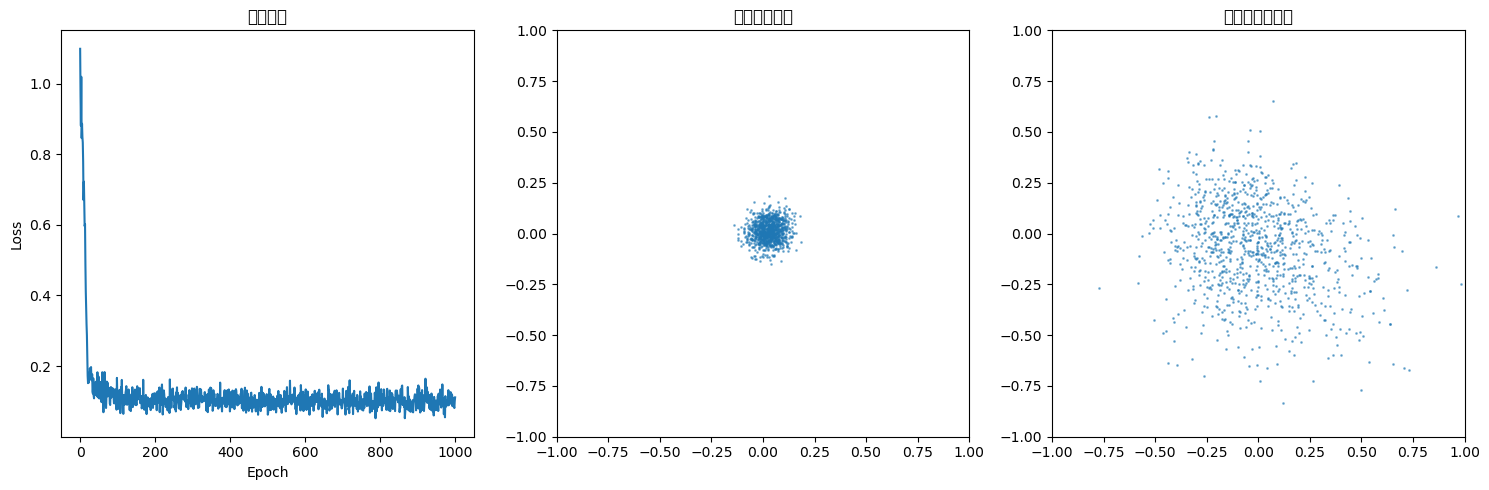

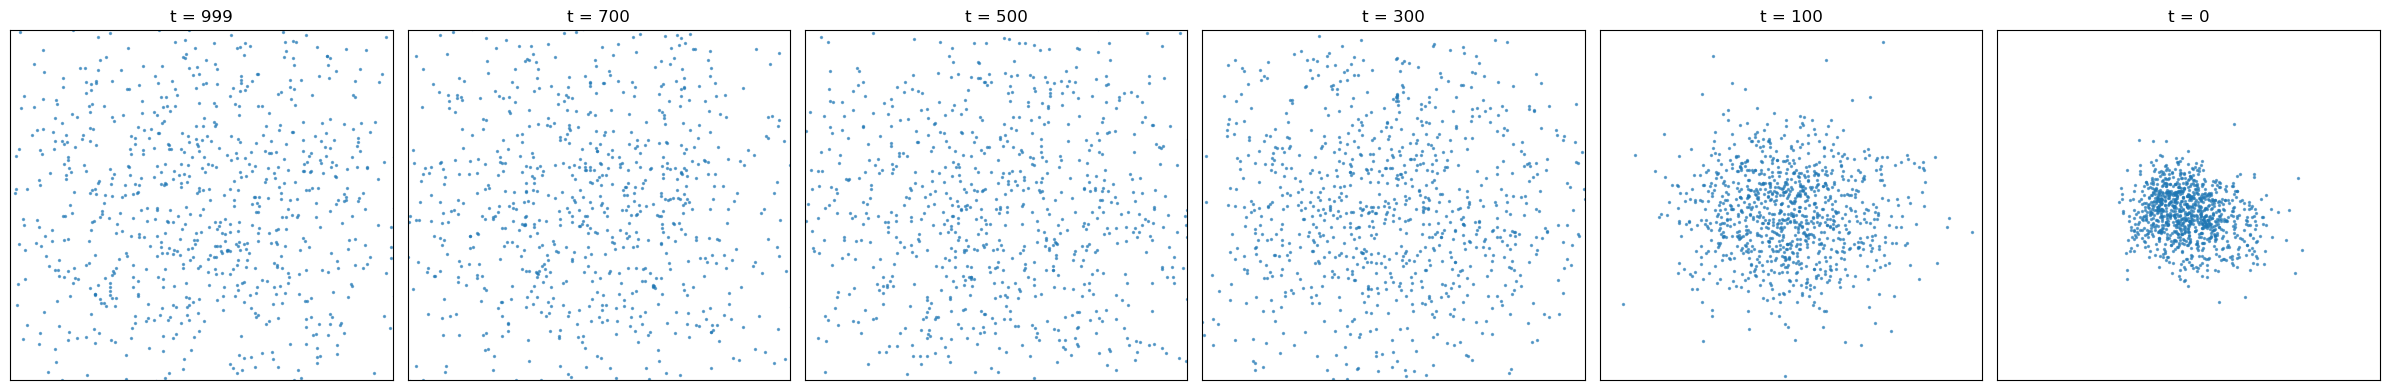

Sampling: 0it [00:00, ?it/s]/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:126: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
Sampling: 1000it [00:01, 920.97it/s]


GIF 已保存: diffusion.gif


/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:297: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:297: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:297: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6q/qdgm1lfd0yz2shlns4z6fm0h0000gn/T/ipykernel_80053/3056854495.py:297: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/o

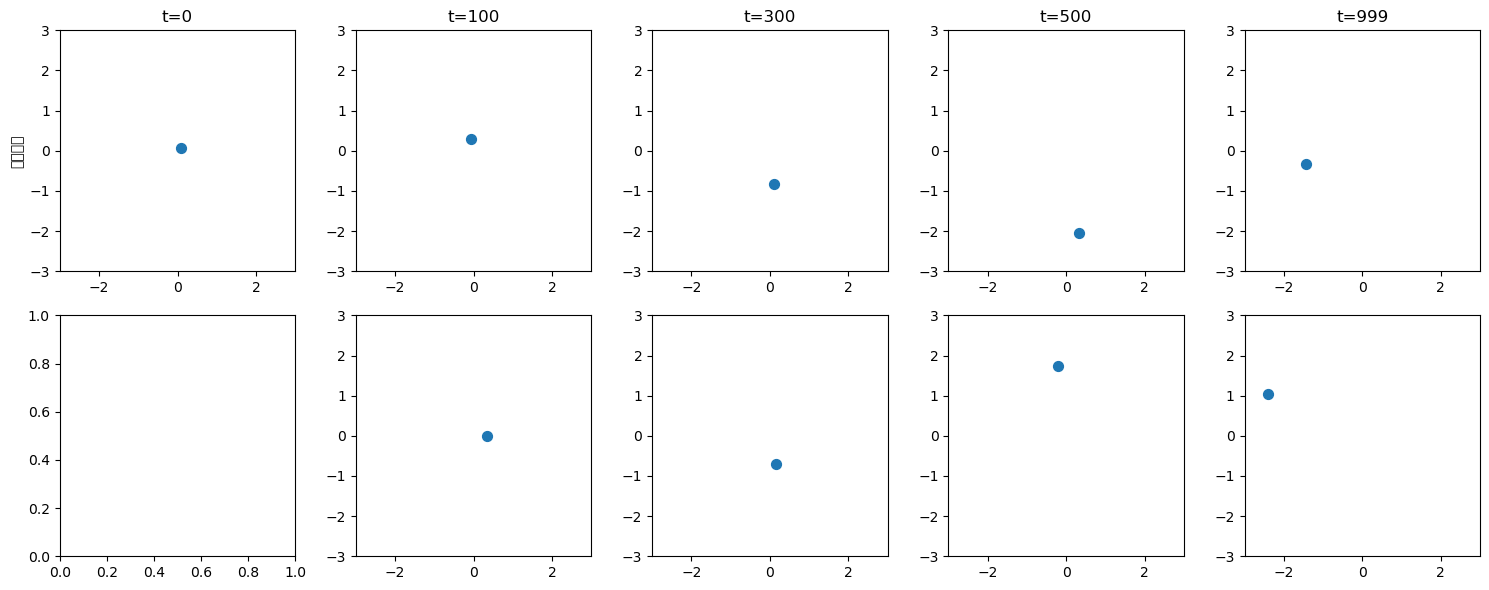

训练完成！


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio

# 设置随机种子
torch.manual_seed(42)
np.random.seed(42)

# 超参数
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
NUM_EPOCHS = 1000
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_TIMESTEPS = 1000
BETA_START = 0.0001
BETA_END = 0.02

class SimpleMLPDenoiser(nn.Module):
    """简单的MLP去噪网络"""
    def __init__(self, input_dim=2, hidden_dim=128, time_embed_dim=16):
        super().__init__()
        self.time_embed_dim = time_embed_dim

        # 主网络
        self.net = nn.Sequential(
            nn.Linear(input_dim + time_embed_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
        )

    def forward(self, x, t):
        # 将时间步转换为嵌入
        t_embed = get_timestep_embedding(t, self.time_embed_dim)
        # 拼接输入和时间嵌入
        x_with_time = torch.cat([x, t_embed], dim=-1)
        return self.net(x_with_time)

def get_timestep_embedding(timesteps, dim):
        """
        生成正弦时间步嵌入（类似Transformer的positional encoding）
        输入: timesteps [batch_size], dim: 嵌入维度
        输出: [batch_size, dim]
        """
        half_dim = dim // 2
        emb = np.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
        emb = timesteps.float().unsqueeze(1) * emb.unsqueeze(0)
        return torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)  

class DiffusionModel:
    """扩散模型主类"""
    def __init__(self, num_timesteps=1000, beta_start=0.0001, beta_end=0.02, device='cpu'):
        self.num_timesteps = num_timesteps
        self.device = device

        # 创建beta调度
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps).to(device)
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.alphas_cumprod_prev = torch.cat([torch.ones(1).to(device), self.alphas_cumprod[:-1]])

        # 预计算一些常用值
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)
        self.sqrt_recip_alphas = torch.sqrt(1.0 / self.alphas)
        self.sqrt_alphas_cumprod_prev = torch.sqrt(self.alphas_cumprod_prev)
        self.sqrt_one_minus_alphas_cumprod_prev = torch.sqrt(1.0 - self.alphas_cumprod_prev)

    def add_noise(self, x0, t, noise=None):
        """前向扩散过程：向数据添加噪声"""
        if noise is None:
            noise = torch.randn_like(x0)

        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[t].view(-1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t].view(-1, 1)

        return sqrt_alphas_cumprod_t * x0 + sqrt_one_minus_alphas_cumprod_t * noise, noise

    def sample_timesteps(self, batch_size):
        """随机采样时间步"""
        return torch.randint(0, self.num_timesteps, (batch_size,), device=self.device)

    @torch.no_grad()
    def sample_and_record(self, model, n_samples, sample_shape=(2,), save_path="sampling.gif", every_n=10):
        model.eval()
        x = torch.randn(n_samples, *sample_shape).to(self.device)
        
        frames = []
        
        for t in tqdm(reversed(range(self.num_timesteps)), desc="Sampling"):
            t_batch = torch.full((n_samples,), t, device=self.device)
            predicted_noise = model(x, t_batch)
            
            beta_t = self.betas[t]
            sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t]
            sqrt_recip_alphas_t = self.sqrt_recip_alphas[t]
            
            model_mean = sqrt_recip_alphas_t * (x - beta_t / sqrt_one_minus_alphas_cumprod_t * predicted_noise)
            
            if t > 0:
                noise = torch.randn_like(x)
                sigma_t = torch.sqrt(self.betas[t])
                x = model_mean + sigma_t * noise
            else:
                x = model_mean

            # 每 n 步保存一次画面
            if t % every_n == 0 or t == self.num_timesteps - 1 or t == 0:
                fig, ax = plt.subplots(figsize=(3, 3))
                x_np = x.detach().cpu().numpy()
                ax.scatter(x_np[:, 0], x_np[:, 1], s=2, alpha=0.6)
                ax.set_xlim(-1.5, 1.5)
                ax.set_ylim(-1.5, 1.5)
                ax.set_xticks([]); ax.set_yticks([])
                ax.set_title(f"t={t}")
                fig.canvas.draw()

                # 保存图像到 numpy 数组
                image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
                image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
                frames.append(image)
                plt.close()

        imageio.mimsave(save_path, frames, fps=10)
        print(f"GIF 已保存: {save_path}")


    @torch.no_grad()
    def sample(self, model, n_samples, sample_shape=(2,)):
        """从模型中采样（不记录过程，仅用于可视化生成）"""
        model.eval()
        x = torch.randn(n_samples, *sample_shape).to(self.device)

        for t in reversed(range(self.num_timesteps)):
            t_batch = torch.full((n_samples,), t, device=self.device)
            predicted_noise = model(x, t_batch)

            beta_t = self.betas[t]
            sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t]
            sqrt_recip_alphas_t = self.sqrt_recip_alphas[t]

            model_mean = sqrt_recip_alphas_t * (x - beta_t / sqrt_one_minus_alphas_cumprod_t * predicted_noise)

            if t > 0:
                noise = torch.randn_like(x)
                sigma_t = torch.sqrt(self.betas[t])
                x = model_mean + sigma_t * noise
            else:
                x = model_mean

        return x



def create_2d_dataset(n_samples=10000):
    """创建一个简单的2D数据集（例如：螺旋形）"""
    t = torch.linspace(0, 2 * np.pi, n_samples)
    r = t
    x = r * torch.cos(t) / 10
    y = r * torch.sin(t) / 10
    data = torch.stack([x, y], dim=1)
    # 添加一些噪声
    data += 0.05 * torch.randn_like(data)
    return data

def train_diffusion_model():
    """训练扩散模型"""
    # 创建数据集
    print("创建数据集...")
    dataset = create_2d_dataset(n_samples=10000).to(DEVICE)

    # 初始化模型和扩散过程
    model = SimpleMLPDenoiser().to(DEVICE)
    diffusion = DiffusionModel(NUM_TIMESTEPS, BETA_START, BETA_END, DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 训练循环
    print("开始训练...")
    losses = []

    for epoch in range(NUM_EPOCHS):
        # 随机选择批次
        indices = torch.randperm(len(dataset))[:BATCH_SIZE]
        batch = dataset[indices]

        # 随机选择时间步
        t = diffusion.sample_timesteps(BATCH_SIZE)

        # 添加噪声
        x_noisy, noise = diffusion.add_noise(batch, t)

        # 预测噪声
        predicted_noise = model(x_noisy, t)

        # 计算损失
        loss = nn.MSELoss()(predicted_noise, noise)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{NUM_EPOCHS}, Loss: {loss.item():.4f}")

    return model, diffusion, dataset, losses

def visualize_results(model, diffusion, dataset, losses):
    """可视化结果"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # 1. 损失曲线
    axes[0].plot(losses)
    axes[0].set_title('训练损失')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')

    # 2. 原始数据
    data_np = dataset.cpu().numpy()
    axes[1].scatter(data_np[:1000, 0], data_np[:1000, 1], alpha=0.5, s=1)
    axes[1].set_title('原始数据分布')
    axes[1].set_xlim(-1, 1)
    axes[1].set_ylim(-1, 1)

    # 3. 生成的样本
    print("生成新样本...")
    generated_samples = diffusion.sample(model, n_samples=1000)
    gen_np = generated_samples.cpu().numpy()
    axes[2].scatter(gen_np[:, 0], gen_np[:, 1], alpha=0.5, s=1)
    axes[2].set_title('生成的数据分布')
    axes[2].set_xlim(-1, 1)
    axes[2].set_ylim(-1, 1)

    plt.tight_layout()
    plt.show()

def demonstrate_denoising_process(model, diffusion, dataset):
    """演示去噪过程"""
    # 选择一个数据点
    x0 = dataset[0:1]

    # 创建不同噪声级别的图像
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    timesteps = [0, 100, 300, 500, 999]

    for i, t in enumerate(timesteps):
        # 添加噪声
        t_tensor = torch.tensor([t], device=DEVICE)
        x_noisy, _ = diffusion.add_noise(x0, t_tensor)

        # 显示加噪结果
        axes[0, i].scatter([x_noisy[0, 0].cpu()], [x_noisy[0, 1].cpu()], s=50)
        axes[0, i].set_xlim(-3, 3)
        axes[0, i].set_ylim(-3, 3)
        axes[0, i].set_title(f't={t}')
        if i == 0:
            axes[0, i].set_ylabel('加噪过程')

    # 显示去噪过程
    x = torch.randn_like(x0).to(DEVICE)
    for i, t in enumerate(reversed(timesteps)):
        if t == 0:
            continue

        # 模拟去噪到这个时间步
        with torch.no_grad():
            for step in range(NUM_TIMESTEPS - 1, t - 1, -1):
                t_batch = torch.full((1,), step, device=DEVICE)
                predicted_noise = model(x, t_batch)

                beta_t = diffusion.betas[step]
                sqrt_one_minus_alphas_cumprod_t = diffusion.sqrt_one_minus_alphas_cumprod[step]
                sqrt_recip_alphas_t = diffusion.sqrt_recip_alphas[step]

                x = sqrt_recip_alphas_t * (x - beta_t / sqrt_one_minus_alphas_cumprod_t * predicted_noise)

                if step > t:
                    noise = torch.randn_like(x)
                    sigma_t = torch.sqrt(diffusion.betas[step])
                    x = x + sigma_t * noise

        axes[1, 4-i].scatter([x[0, 0].cpu()], [x[0, 1].cpu()], s=50)
        axes[1, 4-i].set_xlim(-3, 3)
        axes[1, 4-i].set_ylim(-3, 3)
        if 4-i == 0:
            axes[1, 4-i].set_ylabel('去噪过程')

    plt.tight_layout()
    plt.show()

@torch.no_grad()
def visualize_sampling_steps(diffusion, model, n_samples=1000, steps_to_plot=[999, 700, 500, 300, 100, 0]):
    """
    可视化从 x_T 到 x_0 的采样关键帧（静态图）
    """
    model.eval()
    x = torch.randn(n_samples, 2).to(DEVICE)
    
    fig, axes = plt.subplots(1, len(steps_to_plot), figsize=(4 * len(steps_to_plot), 4))
    
    step_idx = 0
    for t in reversed(range(diffusion.num_timesteps)):
        t_batch = torch.full((n_samples,), t, device=DEVICE)
        predicted_noise = model(x, t_batch)

        beta_t = diffusion.betas[t]
        sqrt_one_minus_alphas_cumprod_t = diffusion.sqrt_one_minus_alphas_cumprod[t]
        sqrt_recip_alphas_t = diffusion.sqrt_recip_alphas[t]

        model_mean = sqrt_recip_alphas_t * (x - beta_t / sqrt_one_minus_alphas_cumprod_t * predicted_noise)

        if t > 0:
            noise = torch.randn_like(x)
            sigma_t = torch.sqrt(diffusion.betas[t])
            x = model_mean + sigma_t * noise
        else:
            x = model_mean

        # 如果是需要可视化的步骤，画出来
        if t in steps_to_plot:
            ax = axes[step_idx]
            x_np = x.detach().cpu().numpy()
            ax.scatter(x_np[:, 0], x_np[:, 1], s=2, alpha=0.6)
            ax.set_xlim(-1.5, 1.5)
            ax.set_ylim(-1.5, 1.5)
            ax.set_title(f't = {t}')
            ax.set_xticks([]); ax.set_yticks([])
            step_idx += 1
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # 训练模型
    model, diffusion, dataset, losses = train_diffusion_model()

    # 可视化结果
    visualize_results(model, diffusion, dataset, losses)

    # 可视化采样步骤
    visualize_sampling_steps(diffusion, model, steps_to_plot=[999, 700, 500, 300, 100, 0])

    # 生成 GIF 动画
    diffusion.sample_and_record(model, n_samples=1000, save_path="diffusion.gif", every_n=20)

    # 演示去噪过程
    demonstrate_denoising_process(model, diffusion, dataset)

    print("训练完成！")